In [1]:
import numpy as np
import pandas as pd

from src.M4_data import prepare_M4_data
from src.utils_visualization import plot_prediction
from src.ESRNN import ESRNN

In [2]:
X_train_df, y_train_df, X_test_df, y_test_df = prepare_M4_data('Quarterly', num_obs=1000)
y_train_df

,unique_id,ds,y
0,Q1,1970-01-02,7407.412314
1,Q1,1970-01-03,7528.566074
2,Q1,1970-01-04,7374.709225
3,Q1,1970-01-05,7395.514848
4,Q1,1970-01-06,7654.007989
...,...,...,...
72477,Q999,1970-03-05,4769.920000
72478,Q999,1970-03-06,4851.440000
72479,Q999,1970-03-07,4978.280000
72480,Q999,1970-03-08,5039.440000


In [3]:
esrnn = ESRNN(max_epochs=1, batch_size=2, rnn_weight_decay=0.5)
# esrnn = ESRNN(max_epochs=2, batch_size=16, learning_rate=3e-4, per_series_lr_multip=1.5,
#               gradient_eps=1e-6, level_variability_penalty=100,
#               dilations=[[1,7],[28]], add_nl_layer=True,
#               seasonality=7, input_size=7, output_size=14)
esrnn.fit(X_train_df, y_train_df)

========== Training ESRNN ==========

========= Epoch 0 finished =========
Training time: 22.52895
Training loss: 0.3303399980068207
Test Pinball loss: 0.01399
Train finished! 



========= Predicting ESRNN =========



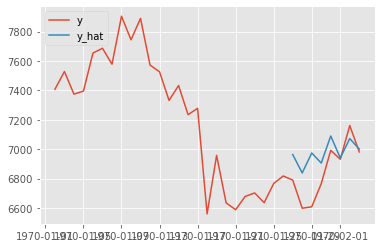

In [4]:
u_id = 'Q1'
X_test = X_test_df.loc[X_test_df.unique_id==u_id, :]
y_train = y_train_df.loc[y_train_df.unique_id==u_id, :]
y_test_aux = y_test_df.loc[y_test_df.unique_id==u_id, :]
y_test = pd.concat([y_train, y_test_aux], axis=0, sort=True)
y_hat = esrnn.predict(X_test)
plot_prediction(y_test, y_hat)

In [5]:
from src.utils_evaluation import owa

y_panel = y_test_df.filter(['unique_id', 'ds', 'y'])
y_naive2_panel = y_test_df.filter(['unique_id', 'ds', 'y_hat_naive2'])
y_naive2_panel.rename(columns={'y_hat_naive2': 'y_hat'})
y_hat_panel = esrnn.predict(X_test_df)
y_insample = y_train.filter(['unique_id', 'ds', 'y'])

owa(y_panel, y_hat_panel, y_naive2_panel, y_insample, seasonality=esrnn.mc.seasonality)

========= Predicting ESRNN =========

====================  mase  ====================


AttributeError: 'numpy.float64' object has no attribute 'append'

In [ ]:
y_test_df

In [ ]:
y_hat